In [1]:
import tensorflow as tf
import os
from Script.DataGenerator import DataGenerator
from Script.Metrics_Evaluation import Evaluation
from BiLSTM import BiLSTM, generate_input, generate_input14, generate_input12, generate_input10, generate_input8, generate_input6
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
gpus =tf.config.list_physical_devices('GPU')
if len(gpus):
    print("Running on GPU")
    tf.config.set_visible_devices(gpus[0], 'GPU')
else :
    print("Running on CPU")

Running on GPU


In [3]:
BATCH_SIZE = 8192
ABC2 = os.path.join("..", "..", "ABC2", "ABC_ssm")
DATA_PATH = os.path.join(ABC2, "Train")
VALIDATION_PATH = os.path.join(ABC2, "Validation")
TEST_PATH = os.path.join(ABC2, "Test")
MODEL_PATH = os.path.join("Model", "BiLSTM")

In [4]:
data__ = []
for gen in  [generate_input, generate_input14, generate_input12, generate_input10, generate_input8, generate_input6]:
    data__.append([DataGenerator(DATA_PATH, gen, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy"), 
                   DataGenerator(DATA_PATH, gen, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")])

## Model Bi-lstm

In [5]:
model_ = [BiLSTM(unit=16).build() for _ in range(6)]
model_[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 6)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 32)               2944      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
___________________________________________________________

## Training 

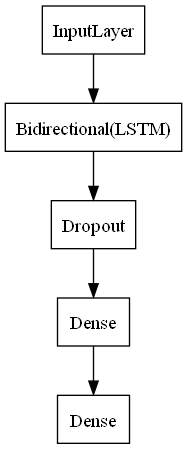

In [6]:
tf.keras.utils.plot_model(model_[0], to_file='model.png', show_layer_names=False)

In [7]:
metrics = ["accuracy", tf.keras.metrics.Precision(thresholds=0.5), tf.keras.metrics.Recall(thresholds=0.5)]

In [8]:
for model in tqdm(model_):
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=metrics)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 374.99it/s]


In [9]:
for i, data in  tqdm(enumerate(data__), total=6):
    datagen_train, datagen_validation = data
    _ = model_[i].fit(datagen_train, validation_data=datagen_validation, epochs=10,
              callbacks= tf.keras.callbacks.ReduceLROnPlateau(factor=tf.math.exp(-4.1), patience=5, min_lr=0.0000001))

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

Epoch 1/10
469/469 [==============================] - 9s 15ms/step - loss: 0.3334 - accuracy: 0.8898 - precision: 0.4889 - recall: 0.0842 - val_loss: 0.2846 - val_accuracy: 0.8909 - val_precision: 0.4000 - val_recall: 4.7720e-06 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2450 - accuracy: 0.9110 - precision: 0.7500 - recall: 0.3184 - val_loss: 0.2860 - val_accuracy: 0.8789 - val_precision: 0.4483 - val_recall: 0.6216 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2302 - accuracy: 0.9173 - precision: 0.7768 - recall: 0.4058 - val_loss: 0.1807 - val_accuracy: 0.9354 - val_precision: 0.8350 - val_recall: 0.5138 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1791 - accuracy: 0.9332 - precision: 0.7983 - recall: 0.4956 - val_loss: 0.1917 - val_accuracy: 0.9327 - val_precision: 0.9778 - val_recall: 0.3991 - lr: 0.0010
Epoch 5/10
469/469 [========================

 17%|██████████████                                                                      | 1/6 [01:07<05:36, 67.39s/it]

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.3266 - accuracy: 0.8882 - precision: 0.8550 - recall: 0.3376 - val_loss: 0.2655 - val_accuracy: 0.8888 - val_precision: 0.4777 - val_recall: 0.0066 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2533 - accuracy: 0.9063 - precision: 0.6906 - recall: 0.2809 - val_loss: 0.2088 - val_accuracy: 0.9305 - val_precision: 0.8983 - val_recall: 0.4254 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2031 - accuracy: 0.9280 - precision: 0.7723 - recall: 0.4575 - val_loss: 0.1725 - val_accuracy: 0.9404 - val_precision: 0.8748 - val_recall: 0.5311 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1696 - accuracy: 0.9389 - precision: 0.8142 - recall: 0.5667 - val_loss: 0.1489 - val_accuracy: 0.9496 - val_precision: 0.8826 - val_recall: 0.6187 - lr: 0.0010
Epoch 5/10
469/469 [============================

 33%|████████████████████████████                                                        | 2/6 [02:11<04:21, 65.41s/it]

Epoch 1/10
469/469 [==============================] - 8s 13ms/step - loss: 0.3591 - accuracy: 0.8591 - precision: 0.6229 - recall: 0.3964 - val_loss: 0.2555 - val_accuracy: 0.9023 - val_precision: 0.7829 - val_recall: 0.1373 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2550 - accuracy: 0.9049 - precision: 0.6815 - recall: 0.2732 - val_loss: 0.2198 - val_accuracy: 0.9221 - val_precision: 0.7665 - val_recall: 0.4674 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2158 - accuracy: 0.9210 - precision: 0.7452 - recall: 0.4653 - val_loss: 0.1879 - val_accuracy: 0.9376 - val_precision: 0.9300 - val_recall: 0.4603 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1867 - accuracy: 0.9348 - precision: 0.8148 - recall: 0.4904 - val_loss: 0.1620 - val_accuracy: 0.9433 - val_precision: 0.9117 - val_recall: 0.5651 - lr: 0.0010
Epoch 5/10
469/469 [============================

 50%|██████████████████████████████████████████                                          | 3/6 [03:10<03:08, 62.71s/it]

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.3414 - accuracy: 0.8726 - precision: 0.7378 - recall: 0.3506 - val_loss: 0.2494 - val_accuracy: 0.8905 - val_precision: 0.7826 - val_recall: 0.0108 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.2291 - accuracy: 0.9165 - precision: 0.7304 - recall: 0.3681 - val_loss: 0.1807 - val_accuracy: 0.9370 - val_precision: 0.8829 - val_recall: 0.4865 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1895 - accuracy: 0.9320 - precision: 0.7909 - recall: 0.5091 - val_loss: 0.1607 - val_accuracy: 0.9411 - val_precision: 0.8192 - val_recall: 0.5924 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1664 - accuracy: 0.9394 - precision: 0.8289 - recall: 0.5638 - val_loss: 0.1470 - val_accuracy: 0.9436 - val_precision: 0.8548 - val_recall: 0.5912 - lr: 0.0010
Epoch 5/10
469/469 [============================

 67%|████████████████████████████████████████████████████████                            | 4/6 [04:08<02:01, 60.54s/it]

Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.3568 - accuracy: 0.8503 - precision: 0.5791 - recall: 0.3919 - val_loss: 0.2549 - val_accuracy: 0.8899 - val_precision: 0.2369 - val_recall: 4.7099e-04 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2286 - accuracy: 0.9205 - precision: 0.7730 - recall: 0.4195 - val_loss: 0.1852 - val_accuracy: 0.9363 - val_precision: 0.8939 - val_recall: 0.4827 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1873 - accuracy: 0.9351 - precision: 0.8129 - recall: 0.5143 - val_loss: 0.1742 - val_accuracy: 0.9405 - val_precision: 0.9547 - val_recall: 0.4822 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1648 - accuracy: 0.9398 - precision: 0.8319 - recall: 0.5676 - val_loss: 0.1627 - val_accuracy: 0.9420 - val_precision: 0.9184 - val_recall: 0.5338 - lr: 0.0010
Epoch 5/10
469/469 [========================

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [05:03<00:58, 58.54s/it]

Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.3333 - accuracy: 0.8874 - precision: 0.7586 - recall: 0.4340 - val_loss: 0.2306 - val_accuracy: 0.9281 - val_precision: 0.7842 - val_recall: 0.4695 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2092 - accuracy: 0.9269 - precision: 0.7565 - recall: 0.4615 - val_loss: 0.2141 - val_accuracy: 0.9300 - val_precision: 0.9908 - val_recall: 0.3731 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1795 - accuracy: 0.9349 - precision: 0.8102 - recall: 0.5083 - val_loss: 0.1811 - val_accuracy: 0.9322 - val_precision: 0.9595 - val_recall: 0.4562 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1640 - accuracy: 0.9398 - precision: 0.8468 - recall: 0.5649 - val_loss: 0.1497 - val_accuracy: 0.9452 - val_precision: 0.8890 - val_recall: 0.5668 - lr: 0.0010
Epoch 5/10
469/469 [============================

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [05:55<00:00, 59.32s/it]


# Evaluate

In [10]:
L = [16, 14, 12, 10, 8, 6]

In [16]:
data__test = [] 
for gen in  [generate_input, generate_input14, generate_input12, generate_input10, generate_input8, generate_input6]:
    data__test.append(DataGenerator(TEST_PATH, gen, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy"))


In [17]:
e__ = []
for i, datagen_test in enumerate(data__test):
    e = Evaluation(model, datagen_test)
    e__.append([L[i], e])
    e.predict()

  0%|                                                                                          | 0/176 [00:00<?, ?it/s]

256/256 [==============================] - 1s 3ms/step


  1%|▍                                                                                 | 1/176 [00:00<02:49,  1.03it/s]

256/256 [==============================] - 1s 2ms/step


  1%|▉                                                                                 | 2/176 [00:01<02:17,  1.27it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▍                                                                                | 3/176 [00:02<01:59,  1.45it/s]

256/256 [==============================] - 0s 2ms/step


  2%|█▊                                                                                | 4/176 [00:02<01:46,  1.61it/s]

256/256 [==============================] - 0s 2ms/step


  3%|██▎                                                                               | 5/176 [00:03<01:39,  1.72it/s]

256/256 [==============================] - 0s 2ms/step


  3%|██▊                                                                               | 6/176 [00:03<01:35,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


  4%|███▎                                                                              | 7/176 [00:04<01:32,  1.83it/s]

256/256 [==============================] - 0s 2ms/step


  5%|███▋                                                                              | 8/176 [00:04<01:30,  1.85it/s]

256/256 [==============================] - 0s 2ms/step


  5%|████▏                                                                             | 9/176 [00:05<01:31,  1.83it/s]

256/256 [==============================] - 1s 2ms/step


  6%|████▌                                                                            | 10/176 [00:05<01:31,  1.82it/s]

256/256 [==============================] - 0s 2ms/step


  6%|█████                                                                            | 11/176 [00:06<01:31,  1.81it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▌                                                                           | 12/176 [00:07<01:31,  1.79it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▉                                                                           | 13/176 [00:07<01:31,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


  8%|██████▍                                                                          | 14/176 [00:08<01:31,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


  9%|██████▉                                                                          | 15/176 [00:08<01:31,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


  9%|███████▎                                                                         | 16/176 [00:09<01:30,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


 10%|███████▊                                                                         | 17/176 [00:09<01:29,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


 10%|████████▎                                                                        | 18/176 [00:10<01:29,  1.77it/s]

256/256 [==============================] - 0s 2ms/step


 11%|████████▋                                                                        | 19/176 [00:11<01:28,  1.78it/s]

256/256 [==============================] - 0s 2ms/step


 11%|█████████▏                                                                       | 20/176 [00:11<01:27,  1.78it/s]

256/256 [==============================] - 0s 2ms/step


 12%|█████████▋                                                                       | 21/176 [00:12<01:26,  1.79it/s]

256/256 [==============================] - 1s 2ms/step


 12%|██████████▏                                                                      | 22/176 [00:12<01:26,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


 13%|██████████▌                                                                      | 23/176 [00:13<01:25,  1.79it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████                                                                      | 24/176 [00:13<01:26,  1.76it/s]

256/256 [==============================] - 0s 2ms/step


 14%|███████████▌                                                                     | 25/176 [00:14<01:25,  1.77it/s]

256/256 [==============================] - 0s 2ms/step


 15%|███████████▉                                                                     | 26/176 [00:14<01:24,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


 15%|████████████▍                                                                    | 27/176 [00:15<01:23,  1.78it/s]

256/256 [==============================] - 0s 2ms/step


 16%|████████████▉                                                                    | 28/176 [00:16<01:22,  1.79it/s]

256/256 [==============================] - 1s 2ms/step


 16%|█████████████▎                                                                   | 29/176 [00:16<01:23,  1.76it/s]

256/256 [==============================] - 1s 2ms/step


 17%|█████████████▊                                                                   | 30/176 [00:17<01:24,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▎                                                                  | 31/176 [00:17<01:26,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▋                                                                  | 32/176 [00:18<01:26,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▏                                                                 | 33/176 [00:19<01:26,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▋                                                                 | 34/176 [00:19<01:26,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████                                                                 | 35/176 [00:20<01:25,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████▌                                                                | 36/176 [00:20<01:25,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 21%|█████████████████                                                                | 37/176 [00:21<01:24,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▍                                                               | 38/176 [00:22<01:24,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▉                                                               | 39/176 [00:22<01:23,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▍                                                              | 40/176 [00:23<01:23,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▊                                                              | 41/176 [00:24<01:22,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 24%|███████████████████▎                                                             | 42/176 [00:24<01:21,  1.65it/s]

256/256 [==============================] - 0s 2ms/step


 24%|███████████████████▊                                                             | 43/176 [00:25<01:18,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 25%|████████████████████▎                                                            | 44/176 [00:25<01:16,  1.72it/s]

256/256 [==============================] - 0s 2ms/step


 26%|████████████████████▋                                                            | 45/176 [00:26<01:15,  1.74it/s]

256/256 [==============================] - 1s 2ms/step


 26%|█████████████████████▏                                                           | 46/176 [00:26<01:15,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 27%|█████████████████████▋                                                           | 47/176 [00:27<01:16,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 27%|██████████████████████                                                           | 48/176 [00:28<01:16,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 28%|██████████████████████▌                                                          | 49/176 [00:28<01:16,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 28%|███████████████████████                                                          | 50/176 [00:29<01:16,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 29%|███████████████████████▍                                                         | 51/176 [00:29<01:16,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 30%|███████████████████████▉                                                         | 52/176 [00:30<01:15,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 30%|████████████████████████▍                                                        | 53/176 [00:31<01:14,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 31%|████████████████████████▊                                                        | 54/176 [00:31<01:14,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 31%|█████████████████████████▎                                                       | 55/176 [00:32<01:13,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 32%|█████████████████████████▊                                                       | 56/176 [00:32<01:12,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 32%|██████████████████████████▏                                                      | 57/176 [00:33<01:12,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 33%|██████████████████████████▋                                                      | 58/176 [00:34<01:12,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▏                                                     | 59/176 [00:34<01:11,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▌                                                     | 60/176 [00:35<01:11,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████                                                     | 61/176 [00:36<01:10,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████▌                                                    | 62/176 [00:36<01:10,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 36%|████████████████████████████▉                                                    | 63/176 [00:37<01:09,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 36%|█████████████████████████████▍                                                   | 64/176 [00:37<01:08,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 37%|█████████████████████████████▉                                                   | 65/176 [00:38<01:07,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▍                                                  | 66/176 [00:39<01:07,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▊                                                  | 67/176 [00:39<01:06,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▎                                                 | 68/176 [00:40<01:06,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▊                                                 | 69/176 [00:40<01:05,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▏                                                | 70/176 [00:41<01:04,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▋                                                | 71/176 [00:42<01:04,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▏                                               | 72/176 [00:42<01:03,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▌                                               | 73/176 [00:43<01:03,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 42%|██████████████████████████████████                                               | 74/176 [00:44<01:02,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▌                                              | 75/176 [00:44<01:01,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▉                                              | 76/176 [00:45<01:01,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▍                                             | 77/176 [00:45<01:00,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▉                                             | 78/176 [00:46<00:59,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▎                                            | 79/176 [00:47<00:59,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▊                                            | 80/176 [00:47<00:58,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 46%|█████████████████████████████████████▎                                           | 81/176 [00:48<00:58,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 47%|█████████████████████████████████████▋                                           | 82/176 [00:48<00:57,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 47%|██████████████████████████████████████▏                                          | 83/176 [00:49<00:56,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 48%|██████████████████████████████████████▋                                          | 84/176 [00:50<00:56,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 48%|███████████████████████████████████████                                          | 85/176 [00:50<00:55,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 49%|███████████████████████████████████████▌                                         | 86/176 [00:51<00:54,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 49%|████████████████████████████████████████                                         | 87/176 [00:51<00:54,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 50%|████████████████████████████████████████▌                                        | 88/176 [00:52<00:53,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 51%|████████████████████████████████████████▉                                        | 89/176 [00:53<00:53,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 51%|█████████████████████████████████████████▍                                       | 90/176 [00:53<00:53,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 52%|█████████████████████████████████████████▉                                       | 91/176 [00:54<00:52,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 52%|██████████████████████████████████████████▎                                      | 92/176 [00:55<00:52,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 53%|██████████████████████████████████████████▊                                      | 93/176 [00:55<00:51,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 53%|███████████████████████████████████████████▎                                     | 94/176 [00:56<00:50,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 54%|███████████████████████████████████████████▋                                     | 95/176 [00:56<00:49,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▏                                    | 96/176 [00:57<00:49,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▋                                    | 97/176 [00:58<00:48,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████                                    | 98/176 [00:58<00:47,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████▌                                   | 99/176 [00:59<00:47,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▍                                  | 100/176 [01:00<00:46,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▉                                  | 101/176 [01:00<00:45,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 58%|██████████████████████████████████████████████▎                                 | 102/176 [01:01<00:45,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 59%|██████████████████████████████████████████████▊                                 | 103/176 [01:01<00:44,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 59%|███████████████████████████████████████████████▎                                | 104/176 [01:02<00:44,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 60%|███████████████████████████████████████████████▋                                | 105/176 [01:03<00:43,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 60%|████████████████████████████████████████████████▏                               | 106/176 [01:03<00:43,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 61%|████████████████████████████████████████████████▋                               | 107/176 [01:04<00:42,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 61%|█████████████████████████████████████████████████                               | 108/176 [01:04<00:41,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 62%|█████████████████████████████████████████████████▌                              | 109/176 [01:05<00:41,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 62%|██████████████████████████████████████████████████                              | 110/176 [01:06<00:40,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████████████████████████████████████████████████▍                             | 111/176 [01:06<00:39,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 64%|██████████████████████████████████████████████████▉                             | 112/176 [01:07<00:39,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 64%|███████████████████████████████████████████████████▎                            | 113/176 [01:07<00:38,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 65%|███████████████████████████████████████████████████▊                            | 114/176 [01:08<00:38,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 65%|████████████████████████████████████████████████████▎                           | 115/176 [01:09<00:37,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 66%|████████████████████████████████████████████████████▋                           | 116/176 [01:09<00:36,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 66%|█████████████████████████████████████████████████████▏                          | 117/176 [01:10<00:36,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 67%|█████████████████████████████████████████████████████▋                          | 118/176 [01:11<00:35,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████                          | 119/176 [01:11<00:34,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████▌                         | 120/176 [01:12<00:34,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████                         | 121/176 [01:12<00:33,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████▍                        | 122/176 [01:13<00:32,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 70%|███████████████████████████████████████████████████████▉                        | 123/176 [01:14<00:32,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 70%|████████████████████████████████████████████████████████▎                       | 124/176 [01:14<00:31,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 71%|████████████████████████████████████████████████████████▊                       | 125/176 [01:15<00:30,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 126/176 [01:15<00:30,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 127/176 [01:16<00:29,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 128/176 [01:17<00:29,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 129/176 [01:17<00:28,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████                     | 130/176 [01:18<00:27,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 131/176 [01:18<00:27,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 75%|████████████████████████████████████████████████████████████                    | 132/176 [01:19<00:26,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 133/176 [01:20<00:26,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 134/176 [01:20<00:25,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 135/176 [01:21<00:25,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 136/176 [01:21<00:24,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 137/176 [01:22<00:23,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 138/176 [01:23<00:23,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 139/176 [01:23<00:22,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 140/176 [01:24<00:22,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 80%|████████████████████████████████████████████████████████████████                | 141/176 [01:25<00:21,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 142/176 [01:25<00:20,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 81%|█████████████████████████████████████████████████████████████████               | 143/176 [01:26<00:20,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 144/176 [01:26<00:19,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 145/176 [01:27<00:19,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 146/176 [01:28<00:18,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 147/176 [01:28<00:17,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 148/176 [01:29<00:17,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 149/176 [01:30<00:16,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 150/176 [01:30<00:16,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 151/176 [01:31<00:15,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 152/176 [01:31<00:14,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 153/176 [01:32<00:14,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 154/176 [01:33<00:13,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 155/176 [01:33<00:12,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 156/176 [01:34<00:12,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 157/176 [01:34<00:11,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 158/176 [01:35<00:11,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 159/176 [01:36<00:10,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 160/176 [01:36<00:09,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 161/176 [01:37<00:09,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 162/176 [01:38<00:08,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 163/176 [01:38<00:08,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 164/176 [01:39<00:07,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 165/176 [01:39<00:06,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 166/176 [01:40<00:06,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 167/176 [01:41<00:05,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 168/176 [01:41<00:04,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 169/176 [01:42<00:04,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 170/176 [01:43<00:03,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 171/176 [01:43<00:03,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 172/176 [01:44<00:02,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 173/176 [01:44<00:01,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 174/176 [01:45<00:01,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 175/176 [01:46<00:00,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


  0%|                                                                                          | 0/176 [00:00<?, ?it/s]

256/256 [==============================] - 1s 3ms/step


  1%|▍                                                                                 | 1/176 [00:01<03:03,  1.05s/it]

256/256 [==============================] - 1s 2ms/step


  1%|▉                                                                                 | 2/176 [00:01<02:17,  1.27it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▍                                                                                | 3/176 [00:02<02:01,  1.42it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▊                                                                                | 4/176 [00:02<01:54,  1.51it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▎                                                                               | 5/176 [00:03<01:49,  1.56it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▊                                                                               | 6/176 [00:04<01:46,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


  4%|███▎                                                                              | 7/176 [00:04<01:44,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


  5%|███▋                                                                              | 8/176 [00:05<01:42,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


  5%|████▏                                                                             | 9/176 [00:05<01:41,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


  6%|████▌                                                                            | 10/176 [00:06<01:40,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  6%|█████                                                                            | 11/176 [00:07<01:39,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▌                                                                           | 12/176 [00:07<01:38,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▉                                                                           | 13/176 [00:08<01:37,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


  8%|██████▍                                                                          | 14/176 [00:08<01:36,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


  9%|██████▉                                                                          | 15/176 [00:09<01:36,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


  9%|███████▎                                                                         | 16/176 [00:10<01:36,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 10%|███████▊                                                                         | 17/176 [00:10<01:35,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 10%|████████▎                                                                        | 18/176 [00:11<01:35,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 11%|████████▋                                                                        | 19/176 [00:11<01:34,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 11%|█████████▏                                                                       | 20/176 [00:12<01:34,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 12%|█████████▋                                                                       | 21/176 [00:13<01:33,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 12%|██████████▏                                                                      | 22/176 [00:13<01:32,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 13%|██████████▌                                                                      | 23/176 [00:14<01:32,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████                                                                      | 24/176 [00:14<01:31,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████▌                                                                     | 25/176 [00:15<01:31,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 15%|███████████▉                                                                     | 26/176 [00:16<01:30,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 15%|████████████▍                                                                    | 27/176 [00:16<01:30,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 16%|████████████▉                                                                    | 28/176 [00:17<01:29,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 16%|█████████████▎                                                                   | 29/176 [00:17<01:28,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 17%|█████████████▊                                                                   | 30/176 [00:18<01:28,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▎                                                                  | 31/176 [00:19<01:28,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▋                                                                  | 32/176 [00:19<01:27,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▏                                                                 | 33/176 [00:20<01:27,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▋                                                                 | 34/176 [00:20<01:26,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████                                                                 | 35/176 [00:21<01:26,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████▌                                                                | 36/176 [00:22<01:26,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 21%|█████████████████                                                                | 37/176 [00:22<01:25,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▍                                                               | 38/176 [00:23<01:25,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▉                                                               | 39/176 [00:24<01:24,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▍                                                              | 40/176 [00:24<01:23,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▊                                                              | 41/176 [00:25<01:23,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 24%|███████████████████▎                                                             | 42/176 [00:25<01:22,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 24%|███████████████████▊                                                             | 43/176 [00:26<01:21,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 25%|████████████████████▎                                                            | 44/176 [00:27<01:21,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 26%|████████████████████▋                                                            | 45/176 [00:27<01:20,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 26%|█████████████████████▏                                                           | 46/176 [00:28<01:19,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 27%|█████████████████████▋                                                           | 47/176 [00:28<01:19,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 27%|██████████████████████                                                           | 48/176 [00:29<01:18,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 28%|██████████████████████▌                                                          | 49/176 [00:30<01:18,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 28%|███████████████████████                                                          | 50/176 [00:30<01:17,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 29%|███████████████████████▍                                                         | 51/176 [00:31<01:16,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 30%|███████████████████████▉                                                         | 52/176 [00:32<01:16,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 30%|████████████████████████▍                                                        | 53/176 [00:32<01:15,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 31%|████████████████████████▊                                                        | 54/176 [00:33<01:14,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 31%|█████████████████████████▎                                                       | 55/176 [00:33<01:14,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 32%|█████████████████████████▊                                                       | 56/176 [00:34<01:13,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 32%|██████████████████████████▏                                                      | 57/176 [00:35<01:13,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 33%|██████████████████████████▋                                                      | 58/176 [00:35<01:12,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▏                                                     | 59/176 [00:36<01:11,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▌                                                     | 60/176 [00:36<01:11,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████                                                     | 61/176 [00:37<01:10,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████▌                                                    | 62/176 [00:38<01:09,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 36%|████████████████████████████▉                                                    | 63/176 [00:38<01:09,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 36%|█████████████████████████████▍                                                   | 64/176 [00:39<01:08,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 37%|█████████████████████████████▉                                                   | 65/176 [00:40<01:07,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▍                                                  | 66/176 [00:40<01:07,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▊                                                  | 67/176 [00:41<01:06,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▎                                                 | 68/176 [00:41<01:05,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▊                                                 | 69/176 [00:42<01:05,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▏                                                | 70/176 [00:43<01:04,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▋                                                | 71/176 [00:43<01:03,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▏                                               | 72/176 [00:44<01:02,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▌                                               | 73/176 [00:44<01:01,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 42%|██████████████████████████████████                                               | 74/176 [00:45<01:01,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▌                                              | 75/176 [00:46<01:00,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▉                                              | 76/176 [00:46<00:59,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▍                                             | 77/176 [00:47<01:00,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▉                                             | 78/176 [00:47<00:59,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▎                                            | 79/176 [00:48<00:59,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▊                                            | 80/176 [00:49<00:59,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 46%|█████████████████████████████████████▎                                           | 81/176 [00:49<00:58,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 47%|█████████████████████████████████████▋                                           | 82/176 [00:50<00:58,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 47%|██████████████████████████████████████▏                                          | 83/176 [00:51<00:57,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 48%|██████████████████████████████████████▋                                          | 84/176 [00:51<00:56,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 48%|███████████████████████████████████████                                          | 85/176 [00:52<00:56,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 49%|███████████████████████████████████████▌                                         | 86/176 [00:52<00:55,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 49%|████████████████████████████████████████                                         | 87/176 [00:53<00:54,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 50%|████████████████████████████████████████▌                                        | 88/176 [00:54<00:53,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 51%|████████████████████████████████████████▉                                        | 89/176 [00:54<00:53,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 51%|█████████████████████████████████████████▍                                       | 90/176 [00:55<00:52,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 52%|█████████████████████████████████████████▉                                       | 91/176 [00:55<00:52,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 52%|██████████████████████████████████████████▎                                      | 92/176 [00:56<00:51,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 53%|██████████████████████████████████████████▊                                      | 93/176 [00:57<00:51,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 53%|███████████████████████████████████████████▎                                     | 94/176 [00:57<00:50,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 54%|███████████████████████████████████████████▋                                     | 95/176 [00:58<00:50,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▏                                    | 96/176 [00:59<00:49,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▋                                    | 97/176 [00:59<00:49,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████                                    | 98/176 [01:00<00:48,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████▌                                   | 99/176 [01:00<00:47,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▍                                  | 100/176 [01:01<00:47,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▉                                  | 101/176 [01:02<00:46,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 58%|██████████████████████████████████████████████▎                                 | 102/176 [01:02<00:45,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 59%|██████████████████████████████████████████████▊                                 | 103/176 [01:03<00:44,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 59%|███████████████████████████████████████████████▎                                | 104/176 [01:03<00:44,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 60%|███████████████████████████████████████████████▋                                | 105/176 [01:04<00:43,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 60%|████████████████████████████████████████████████▏                               | 106/176 [01:05<00:42,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 61%|████████████████████████████████████████████████▋                               | 107/176 [01:05<00:42,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 61%|█████████████████████████████████████████████████                               | 108/176 [01:06<00:41,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 62%|█████████████████████████████████████████████████▌                              | 109/176 [01:07<00:41,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 62%|██████████████████████████████████████████████████                              | 110/176 [01:07<00:40,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████████████████████████████████████████████████▍                             | 111/176 [01:08<00:39,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 64%|██████████████████████████████████████████████████▉                             | 112/176 [01:08<00:38,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 64%|███████████████████████████████████████████████████▎                            | 113/176 [01:09<00:38,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 65%|███████████████████████████████████████████████████▊                            | 114/176 [01:10<00:37,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 65%|████████████████████████████████████████████████████▎                           | 115/176 [01:10<00:36,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 66%|████████████████████████████████████████████████████▋                           | 116/176 [01:11<00:36,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 66%|█████████████████████████████████████████████████████▏                          | 117/176 [01:11<00:36,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 67%|█████████████████████████████████████████████████████▋                          | 118/176 [01:12<00:35,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████                          | 119/176 [01:13<00:34,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████▌                         | 120/176 [01:13<00:34,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████                         | 121/176 [01:14<00:33,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████▍                        | 122/176 [01:14<00:33,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 70%|███████████████████████████████████████████████████████▉                        | 123/176 [01:15<00:32,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 70%|████████████████████████████████████████████████████████▎                       | 124/176 [01:16<00:32,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 71%|████████████████████████████████████████████████████████▊                       | 125/176 [01:16<00:31,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 126/176 [01:17<00:30,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 127/176 [01:18<00:30,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 128/176 [01:18<00:29,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 129/176 [01:19<00:28,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████                     | 130/176 [01:19<00:28,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 131/176 [01:20<00:27,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 75%|████████████████████████████████████████████████████████████                    | 132/176 [01:21<00:27,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 133/176 [01:21<00:26,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 134/176 [01:22<00:25,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 135/176 [01:22<00:25,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 136/176 [01:23<00:24,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 137/176 [01:24<00:23,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 138/176 [01:24<00:23,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 139/176 [01:25<00:22,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 140/176 [01:26<00:22,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 80%|████████████████████████████████████████████████████████████████                | 141/176 [01:26<00:21,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 142/176 [01:27<00:21,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 81%|█████████████████████████████████████████████████████████████████               | 143/176 [01:27<00:20,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 144/176 [01:28<00:19,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 145/176 [01:29<00:19,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 146/176 [01:29<00:18,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 147/176 [01:30<00:17,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 148/176 [01:30<00:17,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 149/176 [01:31<00:16,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 150/176 [01:32<00:16,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 151/176 [01:32<00:15,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 152/176 [01:33<00:14,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 153/176 [01:34<00:14,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 154/176 [01:34<00:13,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 155/176 [01:35<00:12,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 156/176 [01:35<00:12,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 157/176 [01:36<00:11,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 158/176 [01:37<00:10,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 159/176 [01:37<00:10,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 160/176 [01:38<00:09,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 161/176 [01:38<00:09,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 162/176 [01:39<00:08,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 163/176 [01:40<00:07,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 164/176 [01:40<00:07,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 165/176 [01:41<00:06,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 166/176 [01:41<00:06,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 167/176 [01:42<00:05,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 168/176 [01:43<00:04,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 169/176 [01:43<00:04,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 170/176 [01:44<00:03,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 171/176 [01:45<00:03,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 172/176 [01:45<00:02,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 173/176 [01:46<00:01,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 174/176 [01:46<00:01,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 175/176 [01:47<00:00,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  0%|                                                                                          | 0/176 [00:00<?, ?it/s]

256/256 [==============================] - 1s 3ms/step


  1%|▍                                                                                 | 1/176 [00:00<02:07,  1.37it/s]

256/256 [==============================] - 1s 2ms/step


  1%|▉                                                                                 | 2/176 [00:01<01:56,  1.50it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▍                                                                                | 3/176 [00:01<01:51,  1.55it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▊                                                                                | 4/176 [00:02<01:47,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▎                                                                               | 5/176 [00:03<01:44,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▊                                                                               | 6/176 [00:03<01:43,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  4%|███▎                                                                              | 7/176 [00:04<01:41,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


  5%|███▋                                                                              | 8/176 [00:04<01:40,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


  5%|████▏                                                                             | 9/176 [00:05<01:39,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


  6%|████▌                                                                            | 10/176 [00:06<01:38,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


  6%|█████                                                                            | 11/176 [00:06<01:38,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▌                                                                           | 12/176 [00:07<01:37,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▉                                                                           | 13/176 [00:07<01:36,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


  8%|██████▍                                                                          | 14/176 [00:08<01:36,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


  9%|██████▉                                                                          | 15/176 [00:09<01:35,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


  9%|███████▎                                                                         | 16/176 [00:09<01:35,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 10%|███████▊                                                                         | 17/176 [00:10<01:39,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 10%|████████▎                                                                        | 18/176 [00:10<01:35,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 11%|████████▋                                                                        | 19/176 [00:11<01:33,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 11%|█████████▏                                                                       | 20/176 [00:12<01:31,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 12%|█████████▋                                                                       | 21/176 [00:12<01:31,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 12%|██████████▏                                                                      | 22/176 [00:13<01:30,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 13%|██████████▌                                                                      | 23/176 [00:13<01:29,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████                                                                      | 24/176 [00:14<01:29,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████▌                                                                     | 25/176 [00:15<01:28,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 15%|███████████▉                                                                     | 26/176 [00:15<01:26,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 15%|████████████▍                                                                    | 27/176 [00:16<01:25,  1.74it/s]

256/256 [==============================] - 1s 2ms/step


 16%|████████████▉                                                                    | 28/176 [00:16<01:25,  1.74it/s]

256/256 [==============================] - 1s 2ms/step


 16%|█████████████▎                                                                   | 29/176 [00:17<01:24,  1.74it/s]

256/256 [==============================] - 1s 2ms/step


 17%|█████████████▊                                                                   | 30/176 [00:17<01:24,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▎                                                                  | 31/176 [00:18<01:24,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▋                                                                  | 32/176 [00:19<01:24,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▏                                                                 | 33/176 [00:19<01:24,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▋                                                                 | 34/176 [00:20<01:22,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████                                                                 | 35/176 [00:20<01:21,  1.73it/s]

256/256 [==============================] - 0s 2ms/step


 20%|████████████████▌                                                                | 36/176 [00:21<01:20,  1.75it/s]

256/256 [==============================] - 0s 2ms/step


 21%|█████████████████                                                                | 37/176 [00:21<01:18,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▍                                                               | 38/176 [00:22<01:19,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▉                                                               | 39/176 [00:23<01:19,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▍                                                              | 40/176 [00:23<01:19,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▊                                                              | 41/176 [00:24<01:19,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 24%|███████████████████▎                                                             | 42/176 [00:24<01:20,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 24%|███████████████████▊                                                             | 43/176 [00:25<01:20,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 25%|████████████████████▎                                                            | 44/176 [00:26<01:20,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 26%|████████████████████▋                                                            | 45/176 [00:26<01:20,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 26%|█████████████████████▏                                                           | 46/176 [00:27<01:19,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 27%|█████████████████████▋                                                           | 47/176 [00:28<01:19,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 27%|██████████████████████                                                           | 48/176 [00:28<01:18,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 28%|██████████████████████▌                                                          | 49/176 [00:29<01:17,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 28%|███████████████████████                                                          | 50/176 [00:29<01:16,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 29%|███████████████████████▍                                                         | 51/176 [00:30<01:15,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 30%|███████████████████████▉                                                         | 52/176 [00:31<01:15,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 30%|████████████████████████▍                                                        | 53/176 [00:31<01:14,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 31%|████████████████████████▊                                                        | 54/176 [00:32<01:13,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 31%|█████████████████████████▎                                                       | 55/176 [00:32<01:12,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 32%|█████████████████████████▊                                                       | 56/176 [00:33<01:12,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 32%|██████████████████████████▏                                                      | 57/176 [00:34<01:11,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 33%|██████████████████████████▋                                                      | 58/176 [00:34<01:10,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▏                                                     | 59/176 [00:35<01:10,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▌                                                     | 60/176 [00:35<01:09,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████                                                     | 61/176 [00:36<01:09,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████▌                                                    | 62/176 [00:37<01:08,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 36%|████████████████████████████▉                                                    | 63/176 [00:37<01:07,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 36%|█████████████████████████████▍                                                   | 64/176 [00:38<01:07,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 37%|█████████████████████████████▉                                                   | 65/176 [00:38<01:06,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▍                                                  | 66/176 [00:39<01:05,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▊                                                  | 67/176 [00:40<01:05,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▎                                                 | 68/176 [00:40<01:04,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▊                                                 | 69/176 [00:41<01:03,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▏                                                | 70/176 [00:41<01:03,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▋                                                | 71/176 [00:42<01:02,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▏                                               | 72/176 [00:43<01:02,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▌                                               | 73/176 [00:43<01:01,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 42%|██████████████████████████████████                                               | 74/176 [00:44<01:01,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▌                                              | 75/176 [00:44<01:00,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▉                                              | 76/176 [00:45<01:00,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▍                                             | 77/176 [00:46<00:59,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▉                                             | 78/176 [00:46<00:59,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▎                                            | 79/176 [00:47<00:58,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▊                                            | 80/176 [00:47<00:58,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 46%|█████████████████████████████████████▎                                           | 81/176 [00:48<00:57,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 47%|█████████████████████████████████████▋                                           | 82/176 [00:49<00:56,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 47%|██████████████████████████████████████▏                                          | 83/176 [00:49<00:56,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 48%|██████████████████████████████████████▋                                          | 84/176 [00:50<00:55,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 48%|███████████████████████████████████████                                          | 85/176 [00:50<00:55,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 49%|███████████████████████████████████████▌                                         | 86/176 [00:51<00:54,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 49%|████████████████████████████████████████                                         | 87/176 [00:52<00:53,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 50%|████████████████████████████████████████▌                                        | 88/176 [00:52<00:53,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 51%|████████████████████████████████████████▉                                        | 89/176 [00:53<00:52,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 51%|█████████████████████████████████████████▍                                       | 90/176 [00:53<00:51,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 52%|█████████████████████████████████████████▉                                       | 91/176 [00:54<00:51,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 52%|██████████████████████████████████████████▎                                      | 92/176 [00:55<00:50,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 53%|██████████████████████████████████████████▊                                      | 93/176 [00:55<00:50,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 53%|███████████████████████████████████████████▎                                     | 94/176 [00:56<00:49,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 54%|███████████████████████████████████████████▋                                     | 95/176 [00:56<00:49,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▏                                    | 96/176 [00:57<00:49,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▋                                    | 97/176 [00:58<00:48,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████                                    | 98/176 [00:58<00:47,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████▌                                   | 99/176 [00:59<00:47,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▍                                  | 100/176 [00:59<00:46,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▉                                  | 101/176 [01:00<00:45,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 58%|██████████████████████████████████████████████▎                                 | 102/176 [01:01<00:45,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 59%|██████████████████████████████████████████████▊                                 | 103/176 [01:01<00:44,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 59%|███████████████████████████████████████████████▎                                | 104/176 [01:02<00:43,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 60%|███████████████████████████████████████████████▋                                | 105/176 [01:03<00:43,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 60%|████████████████████████████████████████████████▏                               | 106/176 [01:03<00:42,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 61%|████████████████████████████████████████████████▋                               | 107/176 [01:04<00:41,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 61%|█████████████████████████████████████████████████                               | 108/176 [01:04<00:41,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 62%|█████████████████████████████████████████████████▌                              | 109/176 [01:05<00:40,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 62%|██████████████████████████████████████████████████                              | 110/176 [01:06<00:39,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████████████████████████████████████████████████▍                             | 111/176 [01:06<00:39,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 64%|██████████████████████████████████████████████████▉                             | 112/176 [01:07<00:38,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 64%|███████████████████████████████████████████████████▎                            | 113/176 [01:07<00:38,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 65%|███████████████████████████████████████████████████▊                            | 114/176 [01:08<00:37,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 65%|████████████████████████████████████████████████████▎                           | 115/176 [01:09<00:36,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 66%|████████████████████████████████████████████████████▋                           | 116/176 [01:09<00:36,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 66%|█████████████████████████████████████████████████████▏                          | 117/176 [01:10<00:35,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 67%|█████████████████████████████████████████████████████▋                          | 118/176 [01:10<00:35,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████                          | 119/176 [01:11<00:34,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████▌                         | 120/176 [01:12<00:33,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████                         | 121/176 [01:12<00:33,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████▍                        | 122/176 [01:13<00:32,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 70%|███████████████████████████████████████████████████████▉                        | 123/176 [01:13<00:31,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 70%|████████████████████████████████████████████████████████▎                       | 124/176 [01:14<00:31,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 71%|████████████████████████████████████████████████████████▊                       | 125/176 [01:15<00:30,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 126/176 [01:15<00:30,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 127/176 [01:16<00:29,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 128/176 [01:16<00:29,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 129/176 [01:17<00:28,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████                     | 130/176 [01:18<00:27,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 131/176 [01:18<00:27,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 75%|████████████████████████████████████████████████████████████                    | 132/176 [01:19<00:26,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 133/176 [01:19<00:25,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 134/176 [01:20<00:25,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 135/176 [01:21<00:24,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 136/176 [01:21<00:23,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 137/176 [01:22<00:23,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 138/176 [01:22<00:22,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 139/176 [01:23<00:22,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 140/176 [01:24<00:21,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 80%|████████████████████████████████████████████████████████████████                | 141/176 [01:24<00:21,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 142/176 [01:25<00:20,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 81%|█████████████████████████████████████████████████████████████████               | 143/176 [01:25<00:19,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 144/176 [01:26<00:19,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 145/176 [01:27<00:18,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 146/176 [01:27<00:18,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 147/176 [01:28<00:17,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 148/176 [01:28<00:16,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 149/176 [01:29<00:16,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 150/176 [01:30<00:15,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 151/176 [01:30<00:15,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 152/176 [01:31<00:14,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 153/176 [01:32<00:14,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 154/176 [01:32<00:13,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 155/176 [01:33<00:12,  1.65it/s]

256/256 [==============================] - 0s 2ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 156/176 [01:33<00:11,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 157/176 [01:34<00:11,  1.72it/s]

256/256 [==============================] - 0s 2ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 158/176 [01:34<00:10,  1.74it/s]

256/256 [==============================] - 0s 2ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 159/176 [01:35<00:09,  1.78it/s]

256/256 [==============================] - 0s 2ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 160/176 [01:35<00:08,  1.81it/s]

256/256 [==============================] - 0s 2ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 161/176 [01:36<00:08,  1.82it/s]

256/256 [==============================] - 1s 2ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 162/176 [01:37<00:07,  1.78it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 163/176 [01:37<00:07,  1.75it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 164/176 [01:38<00:06,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 165/176 [01:38<00:06,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 166/176 [01:39<00:05,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 167/176 [01:40<00:05,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 168/176 [01:40<00:04,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 169/176 [01:41<00:04,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 170/176 [01:41<00:03,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 171/176 [01:42<00:03,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 172/176 [01:43<00:02,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 173/176 [01:43<00:01,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 174/176 [01:44<00:01,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 175/176 [01:44<00:00,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


  0%|                                                                                          | 0/176 [00:00<?, ?it/s]

256/256 [==============================] - 1s 3ms/step


  1%|▍                                                                                 | 1/176 [00:00<02:15,  1.29it/s]

256/256 [==============================] - 1s 2ms/step


  1%|▉                                                                                 | 2/176 [00:01<02:02,  1.42it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▍                                                                                | 3/176 [00:02<01:54,  1.50it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▊                                                                                | 4/176 [00:02<01:50,  1.55it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▎                                                                               | 5/176 [00:03<01:48,  1.58it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▊                                                                               | 6/176 [00:03<01:45,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


  4%|███▎                                                                              | 7/176 [00:04<01:43,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


  5%|███▋                                                                              | 8/176 [00:05<01:42,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  5%|████▏                                                                             | 9/176 [00:05<01:40,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  6%|████▌                                                                            | 10/176 [00:06<01:40,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  6%|█████                                                                            | 11/176 [00:06<01:41,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▌                                                                           | 12/176 [00:07<01:39,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▉                                                                           | 13/176 [00:08<01:38,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


  8%|██████▍                                                                          | 14/176 [00:08<01:37,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


  9%|██████▉                                                                          | 15/176 [00:09<01:36,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


  9%|███████▎                                                                         | 16/176 [00:09<01:36,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 10%|███████▊                                                                         | 17/176 [00:10<01:36,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 10%|████████▎                                                                        | 18/176 [00:11<01:36,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 11%|████████▋                                                                        | 19/176 [00:11<01:35,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 11%|█████████▏                                                                       | 20/176 [00:12<01:35,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 12%|█████████▋                                                                       | 21/176 [00:12<01:34,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 12%|██████████▏                                                                      | 22/176 [00:13<01:33,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 13%|██████████▌                                                                      | 23/176 [00:14<01:33,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████                                                                      | 24/176 [00:14<01:32,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████▌                                                                     | 25/176 [00:15<01:31,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 15%|███████████▉                                                                     | 26/176 [00:15<01:30,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 15%|████████████▍                                                                    | 27/176 [00:16<01:29,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 16%|████████████▉                                                                    | 28/176 [00:17<01:29,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 16%|█████████████▎                                                                   | 29/176 [00:17<01:28,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 17%|█████████████▊                                                                   | 30/176 [00:18<01:27,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▎                                                                  | 31/176 [00:18<01:27,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▋                                                                  | 32/176 [00:19<01:25,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▏                                                                 | 33/176 [00:20<01:23,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▋                                                                 | 34/176 [00:20<01:22,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████                                                                 | 35/176 [00:21<01:21,  1.74it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████▌                                                                | 36/176 [00:21<01:20,  1.74it/s]

256/256 [==============================] - 1s 2ms/step


 21%|█████████████████                                                                | 37/176 [00:22<01:19,  1.74it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▍                                                               | 38/176 [00:23<01:20,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▉                                                               | 39/176 [00:23<01:21,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▍                                                              | 40/176 [00:24<01:20,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▊                                                              | 41/176 [00:24<01:20,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 24%|███████████████████▎                                                             | 42/176 [00:25<01:19,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 24%|███████████████████▊                                                             | 43/176 [00:26<01:19,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 25%|████████████████████▎                                                            | 44/176 [00:26<01:19,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 26%|████████████████████▋                                                            | 45/176 [00:27<01:18,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 26%|█████████████████████▏                                                           | 46/176 [00:27<01:17,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 27%|█████████████████████▋                                                           | 47/176 [00:28<01:17,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 27%|██████████████████████                                                           | 48/176 [00:29<01:15,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 28%|██████████████████████▌                                                          | 49/176 [00:29<01:15,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 28%|███████████████████████                                                          | 50/176 [00:30<01:14,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 29%|███████████████████████▍                                                         | 51/176 [00:30<01:14,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 30%|███████████████████████▉                                                         | 52/176 [00:31<01:14,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 30%|████████████████████████▍                                                        | 53/176 [00:32<01:14,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 31%|████████████████████████▊                                                        | 54/176 [00:32<01:13,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 31%|█████████████████████████▎                                                       | 55/176 [00:33<01:12,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 32%|█████████████████████████▊                                                       | 56/176 [00:33<01:12,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 32%|██████████████████████████▏                                                      | 57/176 [00:34<01:11,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 33%|██████████████████████████▋                                                      | 58/176 [00:34<01:10,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▏                                                     | 59/176 [00:35<01:09,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▌                                                     | 60/176 [00:36<01:09,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████                                                     | 61/176 [00:36<01:08,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████▌                                                    | 62/176 [00:37<01:08,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 36%|████████████████████████████▉                                                    | 63/176 [00:37<01:07,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 36%|█████████████████████████████▍                                                   | 64/176 [00:38<01:06,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 37%|█████████████████████████████▉                                                   | 65/176 [00:39<01:06,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▍                                                  | 66/176 [00:39<01:05,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▊                                                  | 67/176 [00:40<01:05,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▎                                                 | 68/176 [00:40<01:04,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▊                                                 | 69/176 [00:41<01:04,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▏                                                | 70/176 [00:42<01:03,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▋                                                | 71/176 [00:42<01:03,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▏                                               | 72/176 [00:43<01:03,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▌                                               | 73/176 [00:44<01:02,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 42%|██████████████████████████████████                                               | 74/176 [00:44<01:01,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▌                                              | 75/176 [00:45<01:01,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▉                                              | 76/176 [00:45<01:00,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▍                                             | 77/176 [00:46<01:00,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▉                                             | 78/176 [00:47<00:59,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▎                                            | 79/176 [00:47<00:58,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▊                                            | 80/176 [00:48<00:58,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 46%|█████████████████████████████████████▎                                           | 81/176 [00:48<00:57,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 47%|█████████████████████████████████████▋                                           | 82/176 [00:49<00:57,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 47%|██████████████████████████████████████▏                                          | 83/176 [00:50<00:56,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 48%|██████████████████████████████████████▋                                          | 84/176 [00:50<00:55,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 48%|███████████████████████████████████████                                          | 85/176 [00:51<00:55,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 49%|███████████████████████████████████████▌                                         | 86/176 [00:51<00:54,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 49%|████████████████████████████████████████                                         | 87/176 [00:52<00:54,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 50%|████████████████████████████████████████▌                                        | 88/176 [00:53<00:53,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 51%|████████████████████████████████████████▉                                        | 89/176 [00:53<00:52,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 51%|█████████████████████████████████████████▍                                       | 90/176 [00:54<00:52,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 52%|█████████████████████████████████████████▉                                       | 91/176 [00:54<00:51,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 52%|██████████████████████████████████████████▎                                      | 92/176 [00:55<00:50,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 53%|██████████████████████████████████████████▊                                      | 93/176 [00:56<00:50,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 53%|███████████████████████████████████████████▎                                     | 94/176 [00:56<00:49,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 54%|███████████████████████████████████████████▋                                     | 95/176 [00:57<00:49,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▏                                    | 96/176 [00:57<00:48,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▋                                    | 97/176 [00:58<00:48,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████                                    | 98/176 [00:59<00:47,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████▌                                   | 99/176 [00:59<00:46,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▍                                  | 100/176 [01:00<00:46,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▉                                  | 101/176 [01:01<00:45,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 58%|██████████████████████████████████████████████▎                                 | 102/176 [01:01<00:45,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 59%|██████████████████████████████████████████████▊                                 | 103/176 [01:02<00:44,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 59%|███████████████████████████████████████████████▎                                | 104/176 [01:03<00:47,  1.52it/s]

256/256 [==============================] - 1s 2ms/step


 60%|███████████████████████████████████████████████▋                                | 105/176 [01:03<00:45,  1.55it/s]

256/256 [==============================] - 1s 2ms/step


 60%|████████████████████████████████████████████████▏                               | 106/176 [01:04<00:44,  1.59it/s]

256/256 [==============================] - 1s 2ms/step


 61%|████████████████████████████████████████████████▋                               | 107/176 [01:04<00:42,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 61%|█████████████████████████████████████████████████                               | 108/176 [01:05<00:41,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 62%|█████████████████████████████████████████████████▌                              | 109/176 [01:05<00:40,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 62%|██████████████████████████████████████████████████                              | 110/176 [01:06<00:39,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████████████████████████████████████████████████▍                             | 111/176 [01:07<00:38,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 64%|██████████████████████████████████████████████████▉                             | 112/176 [01:07<00:38,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 64%|███████████████████████████████████████████████████▎                            | 113/176 [01:08<00:37,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 65%|███████████████████████████████████████████████████▊                            | 114/176 [01:08<00:37,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 65%|████████████████████████████████████████████████████▎                           | 115/176 [01:09<00:36,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 66%|████████████████████████████████████████████████████▋                           | 116/176 [01:10<00:35,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 66%|█████████████████████████████████████████████████████▏                          | 117/176 [01:10<00:35,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 67%|█████████████████████████████████████████████████████▋                          | 118/176 [01:11<00:34,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████                          | 119/176 [01:11<00:34,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████▌                         | 120/176 [01:12<00:33,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 69%|███████████████████████████████████████████████████████                         | 121/176 [01:13<00:32,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████▍                        | 122/176 [01:13<00:31,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 70%|███████████████████████████████████████████████████████▉                        | 123/176 [01:14<00:31,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 70%|████████████████████████████████████████████████████████▎                       | 124/176 [01:14<00:30,  1.72it/s]

256/256 [==============================] - 0s 2ms/step


 71%|████████████████████████████████████████████████████████▊                       | 125/176 [01:15<00:29,  1.73it/s]

256/256 [==============================] - 0s 2ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 126/176 [01:16<00:28,  1.75it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 127/176 [01:16<00:27,  1.76it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 128/176 [01:17<00:27,  1.72it/s]

256/256 [==============================] - 0s 2ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 129/176 [01:17<00:26,  1.77it/s]

256/256 [==============================] - 0s 2ms/step


 74%|███████████████████████████████████████████████████████████                     | 130/176 [01:18<00:25,  1.81it/s]

256/256 [==============================] - 0s 2ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 131/176 [01:18<00:24,  1.84it/s]

256/256 [==============================] - 1s 2ms/step


 75%|████████████████████████████████████████████████████████████                    | 132/176 [01:19<00:24,  1.80it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 133/176 [01:19<00:24,  1.78it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 134/176 [01:20<00:23,  1.75it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 135/176 [01:21<00:23,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 136/176 [01:21<00:23,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 137/176 [01:22<00:22,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 138/176 [01:22<00:22,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 139/176 [01:23<00:21,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 140/176 [01:24<00:21,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 80%|████████████████████████████████████████████████████████████████                | 141/176 [01:24<00:20,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 142/176 [01:25<00:20,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 81%|█████████████████████████████████████████████████████████████████               | 143/176 [01:25<00:19,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 144/176 [01:26<00:19,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 145/176 [01:27<00:18,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 146/176 [01:27<00:18,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 147/176 [01:28<00:17,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 148/176 [01:28<00:16,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 149/176 [01:29<00:16,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 150/176 [01:30<00:15,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 151/176 [01:30<00:15,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 152/176 [01:31<00:14,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 153/176 [01:31<00:13,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 154/176 [01:32<00:13,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 155/176 [01:33<00:12,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 156/176 [01:33<00:12,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 157/176 [01:34<00:11,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 158/176 [01:35<00:10,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 159/176 [01:35<00:10,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 160/176 [01:36<00:09,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 161/176 [01:36<00:09,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 162/176 [01:37<00:08,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 163/176 [01:38<00:07,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 164/176 [01:38<00:07,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 165/176 [01:39<00:06,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 166/176 [01:39<00:06,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 167/176 [01:40<00:05,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 168/176 [01:41<00:04,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 169/176 [01:41<00:04,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 170/176 [01:42<00:03,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 171/176 [01:42<00:03,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 172/176 [01:43<00:02,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 173/176 [01:44<00:01,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 174/176 [01:44<00:01,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 175/176 [01:45<00:00,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  0%|                                                                                          | 0/176 [00:00<?, ?it/s]

256/256 [==============================] - 1s 3ms/step


  1%|▍                                                                                 | 1/176 [00:00<02:13,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


  1%|▉                                                                                 | 2/176 [00:01<01:58,  1.47it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▍                                                                                | 3/176 [00:01<01:51,  1.55it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▊                                                                                | 4/176 [00:02<01:46,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▎                                                                               | 5/176 [00:03<01:44,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▊                                                                               | 6/176 [00:03<01:41,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


  4%|███▎                                                                              | 7/176 [00:04<01:40,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


  5%|███▋                                                                              | 8/176 [00:04<01:39,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


  5%|████▏                                                                             | 9/176 [00:05<01:38,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


  6%|████▌                                                                            | 10/176 [00:06<01:37,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


  6%|█████                                                                            | 11/176 [00:06<01:36,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▌                                                                           | 12/176 [00:07<01:35,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▉                                                                           | 13/176 [00:07<01:35,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


  8%|██████▍                                                                          | 14/176 [00:08<01:34,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


  9%|██████▉                                                                          | 15/176 [00:08<01:33,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


  9%|███████▎                                                                         | 16/176 [00:09<01:33,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 10%|███████▊                                                                         | 17/176 [00:10<01:32,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 10%|████████▎                                                                        | 18/176 [00:10<01:31,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 11%|████████▋                                                                        | 19/176 [00:11<01:31,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 11%|█████████▏                                                                       | 20/176 [00:11<01:30,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 12%|█████████▋                                                                       | 21/176 [00:12<01:30,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 12%|██████████▏                                                                      | 22/176 [00:13<01:29,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 13%|██████████▌                                                                      | 23/176 [00:13<01:29,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████                                                                      | 24/176 [00:14<01:28,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████▌                                                                     | 25/176 [00:14<01:28,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 15%|███████████▉                                                                     | 26/176 [00:15<01:27,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 15%|████████████▍                                                                    | 27/176 [00:15<01:27,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 16%|████████████▉                                                                    | 28/176 [00:16<01:26,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 16%|█████████████▎                                                                   | 29/176 [00:17<01:25,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 17%|█████████████▊                                                                   | 30/176 [00:17<01:25,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▎                                                                  | 31/176 [00:18<01:25,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▋                                                                  | 32/176 [00:18<01:24,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▏                                                                 | 33/176 [00:19<01:24,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▋                                                                 | 34/176 [00:20<01:22,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████                                                                 | 35/176 [00:20<01:21,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████▌                                                                | 36/176 [00:21<01:20,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 21%|█████████████████                                                                | 37/176 [00:21<01:20,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▍                                                               | 38/176 [00:22<01:20,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 22%|█████████████████▉                                                               | 39/176 [00:23<01:22,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▍                                                              | 40/176 [00:23<01:21,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██████████████████▊                                                              | 41/176 [00:24<01:20,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 24%|███████████████████▎                                                             | 42/176 [00:24<01:18,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 24%|███████████████████▊                                                             | 43/176 [00:25<01:16,  1.75it/s]

256/256 [==============================] - 0s 2ms/step


 25%|████████████████████▎                                                            | 44/176 [00:25<01:13,  1.80it/s]

256/256 [==============================] - 1s 2ms/step


 26%|████████████████████▋                                                            | 45/176 [00:26<01:13,  1.78it/s]

256/256 [==============================] - 1s 2ms/step


 26%|█████████████████████▏                                                           | 46/176 [00:26<01:13,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


 27%|█████████████████████▋                                                           | 47/176 [00:27<01:13,  1.75it/s]

256/256 [==============================] - 1s 2ms/step


 27%|██████████████████████                                                           | 48/176 [00:28<01:14,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 28%|██████████████████████▌                                                          | 49/176 [00:28<01:13,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 28%|███████████████████████                                                          | 50/176 [00:29<01:13,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 29%|███████████████████████▍                                                         | 51/176 [00:29<01:13,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 30%|███████████████████████▉                                                         | 52/176 [00:30<01:13,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 30%|████████████████████████▍                                                        | 53/176 [00:31<01:12,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 31%|████████████████████████▊                                                        | 54/176 [00:31<01:12,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 31%|█████████████████████████▎                                                       | 55/176 [00:32<01:12,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 32%|█████████████████████████▊                                                       | 56/176 [00:32<01:11,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 32%|██████████████████████████▏                                                      | 57/176 [00:33<01:10,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 33%|██████████████████████████▋                                                      | 58/176 [00:34<01:10,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▏                                                     | 59/176 [00:34<01:09,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▌                                                     | 60/176 [00:35<01:09,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████                                                     | 61/176 [00:35<01:08,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 35%|████████████████████████████▌                                                    | 62/176 [00:36<01:07,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 36%|████████████████████████████▉                                                    | 63/176 [00:37<01:07,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 36%|█████████████████████████████▍                                                   | 64/176 [00:37<01:06,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 37%|█████████████████████████████▉                                                   | 65/176 [00:38<01:06,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▍                                                  | 66/176 [00:38<01:05,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▊                                                  | 67/176 [00:39<01:05,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▎                                                 | 68/176 [00:40<01:04,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▊                                                 | 69/176 [00:40<01:03,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▏                                                | 70/176 [00:41<01:03,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▋                                                | 71/176 [00:41<01:02,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▏                                               | 72/176 [00:42<01:01,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▌                                               | 73/176 [00:43<01:01,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 42%|██████████████████████████████████                                               | 74/176 [00:43<01:00,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▌                                              | 75/176 [00:44<00:59,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 43%|██████████████████████████████████▉                                              | 76/176 [00:44<00:58,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▍                                             | 77/176 [00:45<00:58,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 44%|███████████████████████████████████▉                                             | 78/176 [00:45<00:57,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▎                                            | 79/176 [00:46<00:56,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████████████████████████████████████▊                                            | 80/176 [00:47<00:56,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 46%|█████████████████████████████████████▎                                           | 81/176 [00:47<00:55,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 47%|█████████████████████████████████████▋                                           | 82/176 [00:48<00:55,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 47%|██████████████████████████████████████▏                                          | 83/176 [00:48<00:54,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 48%|██████████████████████████████████████▋                                          | 84/176 [00:49<00:54,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 48%|███████████████████████████████████████                                          | 85/176 [00:50<00:53,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 49%|███████████████████████████████████████▌                                         | 86/176 [00:50<00:52,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 49%|████████████████████████████████████████                                         | 87/176 [00:51<00:52,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 50%|████████████████████████████████████████▌                                        | 88/176 [00:51<00:51,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 51%|████████████████████████████████████████▉                                        | 89/176 [00:52<00:50,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 51%|█████████████████████████████████████████▍                                       | 90/176 [00:53<00:50,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 52%|█████████████████████████████████████████▉                                       | 91/176 [00:53<00:49,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 52%|██████████████████████████████████████████▎                                      | 92/176 [00:54<00:49,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 53%|██████████████████████████████████████████▊                                      | 93/176 [00:54<00:48,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 53%|███████████████████████████████████████████▎                                     | 94/176 [00:55<00:48,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 54%|███████████████████████████████████████████▋                                     | 95/176 [00:55<00:47,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▏                                    | 96/176 [00:56<00:47,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▋                                    | 97/176 [00:57<00:46,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████                                    | 98/176 [00:57<00:45,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████▌                                   | 99/176 [00:58<00:45,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▍                                  | 100/176 [00:58<00:44,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▉                                  | 101/176 [00:59<00:44,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 58%|██████████████████████████████████████████████▎                                 | 102/176 [01:00<00:43,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 59%|██████████████████████████████████████████████▊                                 | 103/176 [01:00<00:42,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 59%|███████████████████████████████████████████████▎                                | 104/176 [01:01<00:42,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 60%|███████████████████████████████████████████████▋                                | 105/176 [01:01<00:41,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 60%|████████████████████████████████████████████████▏                               | 106/176 [01:02<00:40,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 61%|████████████████████████████████████████████████▋                               | 107/176 [01:03<00:40,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 61%|█████████████████████████████████████████████████                               | 108/176 [01:03<00:39,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 62%|█████████████████████████████████████████████████▌                              | 109/176 [01:04<00:39,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 62%|██████████████████████████████████████████████████                              | 110/176 [01:04<00:39,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████████████████████████████████████████████████▍                             | 111/176 [01:05<00:38,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 64%|██████████████████████████████████████████████████▉                             | 112/176 [01:05<00:37,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 64%|███████████████████████████████████████████████████▎                            | 113/176 [01:06<00:37,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 65%|███████████████████████████████████████████████████▊                            | 114/176 [01:07<00:36,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 65%|████████████████████████████████████████████████████▎                           | 115/176 [01:07<00:36,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 66%|████████████████████████████████████████████████████▋                           | 116/176 [01:08<00:35,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 66%|█████████████████████████████████████████████████████▏                          | 117/176 [01:08<00:35,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 67%|█████████████████████████████████████████████████████▋                          | 118/176 [01:09<00:34,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████                          | 119/176 [01:10<00:34,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████▌                         | 120/176 [01:10<00:33,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████                         | 121/176 [01:11<00:32,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████▍                        | 122/176 [01:11<00:32,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 70%|███████████████████████████████████████████████████████▉                        | 123/176 [01:12<00:31,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 70%|████████████████████████████████████████████████████████▎                       | 124/176 [01:13<00:31,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 71%|████████████████████████████████████████████████████████▊                       | 125/176 [01:13<00:30,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 126/176 [01:14<00:29,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 127/176 [01:14<00:29,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 128/176 [01:15<00:28,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 129/176 [01:16<00:28,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████                     | 130/176 [01:16<00:27,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 131/176 [01:17<00:26,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 75%|████████████████████████████████████████████████████████████                    | 132/176 [01:17<00:26,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 133/176 [01:18<00:25,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 134/176 [01:19<00:24,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 135/176 [01:19<00:24,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 136/176 [01:20<00:23,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 137/176 [01:20<00:23,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 138/176 [01:21<00:22,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 139/176 [01:22<00:22,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 140/176 [01:22<00:21,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 80%|████████████████████████████████████████████████████████████████                | 141/176 [01:23<00:21,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 142/176 [01:23<00:20,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 81%|█████████████████████████████████████████████████████████████████               | 143/176 [01:24<00:19,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 144/176 [01:25<00:18,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 145/176 [01:25<00:18,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 146/176 [01:26<00:17,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 147/176 [01:26<00:17,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 148/176 [01:27<00:16,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 149/176 [01:27<00:15,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 150/176 [01:28<00:15,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 151/176 [01:29<00:14,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 152/176 [01:29<00:13,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 153/176 [01:30<00:13,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 154/176 [01:30<00:12,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 155/176 [01:31<00:12,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 156/176 [01:32<00:11,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 157/176 [01:32<00:11,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 158/176 [01:33<00:10,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 159/176 [01:33<00:09,  1.74it/s]

256/256 [==============================] - 0s 2ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 160/176 [01:34<00:09,  1.76it/s]

256/256 [==============================] - 1s 2ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 161/176 [01:34<00:08,  1.76it/s]

256/256 [==============================] - 1s 2ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 162/176 [01:35<00:07,  1.76it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 163/176 [01:36<00:07,  1.76it/s]

256/256 [==============================] - 0s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 164/176 [01:36<00:06,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 165/176 [01:37<00:06,  1.77it/s]

256/256 [==============================] - 0s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 166/176 [01:37<00:05,  1.78it/s]

256/256 [==============================] - 1s 2ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 167/176 [01:38<00:05,  1.78it/s]

256/256 [==============================] - 0s 2ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 168/176 [01:38<00:04,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 169/176 [01:39<00:03,  1.79it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 170/176 [01:39<00:03,  1.78it/s]

256/256 [==============================] - 0s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 171/176 [01:40<00:02,  1.79it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 172/176 [01:41<00:02,  1.78it/s]

256/256 [==============================] - 0s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 173/176 [01:41<00:01,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 174/176 [01:42<00:01,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 175/176 [01:42<00:00,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


  0%|                                                                                          | 0/176 [00:00<?, ?it/s]

256/256 [==============================] - 1s 3ms/step


  1%|▍                                                                                 | 1/176 [00:00<02:07,  1.37it/s]

256/256 [==============================] - 1s 2ms/step


  1%|▉                                                                                 | 2/176 [00:01<01:56,  1.50it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▍                                                                                | 3/176 [00:01<01:49,  1.58it/s]

256/256 [==============================] - 1s 2ms/step


  2%|█▊                                                                                | 4/176 [00:02<01:46,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▎                                                                               | 5/176 [00:03<01:44,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


  3%|██▊                                                                               | 6/176 [00:03<01:43,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  4%|███▎                                                                              | 7/176 [00:04<01:41,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


  5%|███▋                                                                              | 8/176 [00:04<01:40,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


  5%|████▏                                                                             | 9/176 [00:05<01:39,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


  6%|████▌                                                                            | 10/176 [00:06<01:38,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


  6%|█████                                                                            | 11/176 [00:06<01:37,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▌                                                                           | 12/176 [00:07<01:36,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


  7%|█████▉                                                                           | 13/176 [00:07<01:35,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


  8%|██████▍                                                                          | 14/176 [00:08<01:35,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


  9%|██████▉                                                                          | 15/176 [00:09<01:35,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


  9%|███████▎                                                                         | 16/176 [00:09<01:35,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 10%|███████▊                                                                         | 17/176 [00:10<01:34,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 10%|████████▎                                                                        | 18/176 [00:10<01:34,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 11%|████████▋                                                                        | 19/176 [00:11<01:33,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 11%|█████████▏                                                                       | 20/176 [00:12<01:33,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 12%|█████████▋                                                                       | 21/176 [00:12<01:31,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 12%|██████████▏                                                                      | 22/176 [00:13<01:31,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 13%|██████████▌                                                                      | 23/176 [00:13<01:30,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████                                                                      | 24/176 [00:14<01:29,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 14%|███████████▌                                                                     | 25/176 [00:14<01:28,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 15%|███████████▉                                                                     | 26/176 [00:15<01:27,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 15%|████████████▍                                                                    | 27/176 [00:16<01:27,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 16%|████████████▉                                                                    | 28/176 [00:16<01:26,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 16%|█████████████▎                                                                   | 29/176 [00:17<01:26,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 17%|█████████████▊                                                                   | 30/176 [00:17<01:25,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▎                                                                  | 31/176 [00:18<01:25,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 18%|██████████████▋                                                                  | 32/176 [00:19<01:24,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▏                                                                 | 33/176 [00:19<01:23,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 19%|███████████████▋                                                                 | 34/176 [00:20<01:23,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████                                                                 | 35/176 [00:20<01:22,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 20%|████████████████▌                                                                | 36/176 [00:21<01:20,  1.73it/s]

256/256 [==============================] - 0s 2ms/step


 21%|█████████████████                                                                | 37/176 [00:21<01:19,  1.76it/s]

256/256 [==============================] - 0s 2ms/step


 22%|█████████████████▍                                                               | 38/176 [00:22<01:17,  1.78it/s]

256/256 [==============================] - 0s 2ms/step


 22%|█████████████████▉                                                               | 39/176 [00:23<01:16,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 23%|██████████████████▍                                                              | 40/176 [00:23<01:14,  1.81it/s]

256/256 [==============================] - 0s 2ms/step


 23%|██████████████████▊                                                              | 41/176 [00:24<01:14,  1.82it/s]

256/256 [==============================] - 0s 2ms/step


 24%|███████████████████▎                                                             | 42/176 [00:24<01:13,  1.83it/s]

256/256 [==============================] - 0s 2ms/step


 24%|███████████████████▊                                                             | 43/176 [00:25<01:12,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 25%|████████████████████▎                                                            | 44/176 [00:25<01:11,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 26%|████████████████████▋                                                            | 45/176 [00:26<01:11,  1.83it/s]

256/256 [==============================] - 0s 2ms/step


 26%|█████████████████████▏                                                           | 46/176 [00:26<01:10,  1.83it/s]

256/256 [==============================] - 0s 2ms/step


 27%|█████████████████████▋                                                           | 47/176 [00:27<01:10,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 27%|██████████████████████                                                           | 48/176 [00:27<01:09,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 28%|██████████████████████▌                                                          | 49/176 [00:28<01:09,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 28%|███████████████████████                                                          | 50/176 [00:28<01:08,  1.83it/s]

256/256 [==============================] - 0s 2ms/step


 29%|███████████████████████▍                                                         | 51/176 [00:29<01:08,  1.83it/s]

256/256 [==============================] - 0s 2ms/step


 30%|███████████████████████▉                                                         | 52/176 [00:30<01:07,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 30%|████████████████████████▍                                                        | 53/176 [00:30<01:07,  1.83it/s]

256/256 [==============================] - 0s 2ms/step


 31%|████████████████████████▊                                                        | 54/176 [00:31<01:07,  1.81it/s]

256/256 [==============================] - 1s 2ms/step


 31%|█████████████████████████▎                                                       | 55/176 [00:31<01:07,  1.80it/s]

256/256 [==============================] - 1s 2ms/step


 32%|█████████████████████████▊                                                       | 56/176 [00:32<01:07,  1.78it/s]

256/256 [==============================] - 1s 2ms/step


 32%|██████████████████████████▏                                                      | 57/176 [00:32<01:06,  1.78it/s]

256/256 [==============================] - 1s 2ms/step


 33%|██████████████████████████▋                                                      | 58/176 [00:33<01:06,  1.77it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▏                                                     | 59/176 [00:34<01:06,  1.75it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███████████████████████████▌                                                     | 60/176 [00:34<01:06,  1.73it/s]

256/256 [==============================] - 0s 2ms/step


 35%|████████████████████████████                                                     | 61/176 [00:35<01:05,  1.75it/s]

256/256 [==============================] - 0s 2ms/step


 35%|████████████████████████████▌                                                    | 62/176 [00:35<01:04,  1.77it/s]

256/256 [==============================] - 0s 2ms/step


 36%|████████████████████████████▉                                                    | 63/176 [00:36<01:03,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


 36%|█████████████████████████████▍                                                   | 64/176 [00:36<01:02,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 37%|█████████████████████████████▉                                                   | 65/176 [00:37<01:01,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 38%|██████████████████████████████▍                                                  | 66/176 [00:37<01:01,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 38%|██████████████████████████████▊                                                  | 67/176 [00:38<01:00,  1.81it/s]

256/256 [==============================] - 0s 2ms/step


 39%|███████████████████████████████▎                                                 | 68/176 [00:39<00:59,  1.83it/s]

256/256 [==============================] - 0s 2ms/step


 39%|███████████████████████████████▊                                                 | 69/176 [00:39<00:58,  1.83it/s]

256/256 [==============================] - 0s 2ms/step


 40%|████████████████████████████████▏                                                | 70/176 [00:40<00:57,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 40%|████████████████████████████████▋                                                | 71/176 [00:40<00:57,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 41%|█████████████████████████████████▏                                               | 72/176 [00:41<00:56,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 41%|█████████████████████████████████▌                                               | 73/176 [00:41<00:56,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 42%|██████████████████████████████████                                               | 74/176 [00:42<00:55,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 43%|██████████████████████████████████▌                                              | 75/176 [00:42<00:55,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 43%|██████████████████████████████████▉                                              | 76/176 [00:43<00:54,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 44%|███████████████████████████████████▍                                             | 77/176 [00:43<00:53,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 44%|███████████████████████████████████▉                                             | 78/176 [00:44<00:53,  1.84it/s]

256/256 [==============================] - 0s 2ms/step


 45%|████████████████████████████████████▎                                            | 79/176 [00:45<00:53,  1.82it/s]

256/256 [==============================] - 0s 2ms/step


 45%|████████████████████████████████████▊                                            | 80/176 [00:45<00:52,  1.82it/s]

256/256 [==============================] - 0s 2ms/step


 46%|█████████████████████████████████████▎                                           | 81/176 [00:46<00:52,  1.82it/s]

256/256 [==============================] - 0s 2ms/step


 47%|█████████████████████████████████████▋                                           | 82/176 [00:46<00:51,  1.82it/s]

256/256 [==============================] - 0s 2ms/step


 47%|██████████████████████████████████████▏                                          | 83/176 [00:47<00:50,  1.83it/s]

256/256 [==============================] - 1s 2ms/step


 48%|██████████████████████████████████████▋                                          | 84/176 [00:47<00:50,  1.81it/s]

256/256 [==============================] - 1s 2ms/step


 48%|███████████████████████████████████████                                          | 85/176 [00:48<00:50,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


 49%|███████████████████████████████████████▌                                         | 86/176 [00:48<00:50,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


 49%|████████████████████████████████████████                                         | 87/176 [00:49<00:49,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 50%|████████████████████████████████████████▌                                        | 88/176 [00:50<00:48,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 51%|████████████████████████████████████████▉                                        | 89/176 [00:50<00:48,  1.81it/s]

256/256 [==============================] - 1s 2ms/step


 51%|█████████████████████████████████████████▍                                       | 90/176 [00:51<00:47,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 52%|█████████████████████████████████████████▉                                       | 91/176 [00:51<00:47,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 52%|██████████████████████████████████████████▎                                      | 92/176 [00:52<00:46,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 53%|██████████████████████████████████████████▊                                      | 93/176 [00:52<00:46,  1.80it/s]

256/256 [==============================] - 1s 2ms/step


 53%|███████████████████████████████████████████▎                                     | 94/176 [00:53<00:45,  1.80it/s]

256/256 [==============================] - 1s 2ms/step


 54%|███████████████████████████████████████████▋                                     | 95/176 [00:53<00:45,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


 55%|████████████████████████████████████████████▏                                    | 96/176 [00:54<00:44,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 55%|████████████████████████████████████████████▋                                    | 97/176 [00:55<00:44,  1.79it/s]

256/256 [==============================] - 0s 2ms/step


 56%|█████████████████████████████████████████████                                    | 98/176 [00:55<00:43,  1.80it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████▌                                   | 99/176 [00:56<00:43,  1.78it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▍                                  | 100/176 [00:56<00:43,  1.76it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████████████████████████████████████████████▉                                  | 101/176 [00:57<00:43,  1.74it/s]

256/256 [==============================] - 1s 2ms/step


 58%|██████████████████████████████████████████████▎                                 | 102/176 [00:57<00:42,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 59%|██████████████████████████████████████████████▊                                 | 103/176 [00:58<00:42,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 59%|███████████████████████████████████████████████▎                                | 104/176 [00:59<00:42,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 60%|███████████████████████████████████████████████▋                                | 105/176 [00:59<00:41,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 60%|████████████████████████████████████████████████▏                               | 106/176 [01:00<00:40,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 61%|████████████████████████████████████████████████▋                               | 107/176 [01:00<00:40,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 61%|█████████████████████████████████████████████████                               | 108/176 [01:01<00:39,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 62%|█████████████████████████████████████████████████▌                              | 109/176 [01:02<00:38,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 62%|██████████████████████████████████████████████████                              | 110/176 [01:02<00:38,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████████████████████████████████████████████████▍                             | 111/176 [01:03<00:37,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 64%|██████████████████████████████████████████████████▉                             | 112/176 [01:03<00:37,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 64%|███████████████████████████████████████████████████▎                            | 113/176 [01:04<00:36,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 65%|███████████████████████████████████████████████████▊                            | 114/176 [01:04<00:35,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 65%|████████████████████████████████████████████████████▎                           | 115/176 [01:05<00:35,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 66%|████████████████████████████████████████████████████▋                           | 116/176 [01:06<00:34,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 66%|█████████████████████████████████████████████████████▏                          | 117/176 [01:06<00:34,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 67%|█████████████████████████████████████████████████████▋                          | 118/176 [01:07<00:33,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████                          | 119/176 [01:07<00:32,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████████████████████████████████████████████████████▌                         | 120/176 [01:08<00:32,  1.74it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████                         | 121/176 [01:08<00:31,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 69%|███████████████████████████████████████████████████████▍                        | 122/176 [01:09<00:31,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 70%|███████████████████████████████████████████████████████▉                        | 123/176 [01:10<00:30,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 70%|████████████████████████████████████████████████████████▎                       | 124/176 [01:10<00:30,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 71%|████████████████████████████████████████████████████████▊                       | 125/176 [01:11<00:29,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 126/176 [01:11<00:29,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 127/176 [01:12<00:28,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 128/176 [01:13<00:27,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 129/176 [01:13<00:27,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████                     | 130/176 [01:14<00:26,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 131/176 [01:14<00:26,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 75%|████████████████████████████████████████████████████████████                    | 132/176 [01:15<00:25,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 133/176 [01:15<00:25,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 134/176 [01:16<00:24,  1.73it/s]

256/256 [==============================] - 0s 2ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 135/176 [01:17<00:23,  1.76it/s]

256/256 [==============================] - 0s 2ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 136/176 [01:17<00:22,  1.78it/s]

256/256 [==============================] - 0s 2ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 137/176 [01:18<00:21,  1.80it/s]

256/256 [==============================] - 0s 2ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 138/176 [01:18<00:21,  1.81it/s]

256/256 [==============================] - 0s 2ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 139/176 [01:19<00:20,  1.82it/s]

256/256 [==============================] - 0s 2ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 140/176 [01:19<00:19,  1.81it/s]

256/256 [==============================] - 0s 2ms/step


 80%|████████████████████████████████████████████████████████████████                | 141/176 [01:20<00:19,  1.81it/s]

256/256 [==============================] - 0s 2ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 142/176 [01:20<00:18,  1.82it/s]

256/256 [==============================] - 0s 2ms/step


 81%|█████████████████████████████████████████████████████████████████               | 143/176 [01:21<00:18,  1.81it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 144/176 [01:22<00:17,  1.78it/s]

256/256 [==============================] - 1s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 145/176 [01:22<00:17,  1.76it/s]

256/256 [==============================] - 1s 2ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 146/176 [01:23<00:17,  1.73it/s]

256/256 [==============================] - 1s 2ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 147/176 [01:23<00:16,  1.72it/s]

256/256 [==============================] - 1s 2ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 148/176 [01:24<00:16,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 149/176 [01:24<00:15,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 150/176 [01:25<00:15,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 151/176 [01:26<00:14,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 152/176 [01:26<00:14,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 153/176 [01:27<00:13,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 154/176 [01:27<00:12,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 155/176 [01:28<00:12,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 156/176 [01:29<00:11,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 157/176 [01:29<00:11,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 158/176 [01:30<00:10,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 159/176 [01:30<00:09,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 160/176 [01:31<00:09,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 161/176 [01:32<00:08,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 162/176 [01:32<00:08,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 163/176 [01:33<00:07,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 164/176 [01:33<00:07,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 165/176 [01:34<00:06,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 166/176 [01:34<00:05,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 167/176 [01:35<00:05,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 168/176 [01:36<00:04,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 169/176 [01:36<00:04,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 170/176 [01:37<00:03,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 171/176 [01:37<00:02,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 172/176 [01:38<00:02,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 173/176 [01:39<00:01,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 174/176 [01:39<00:01,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 175/176 [01:40<00:00,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 176/176 [01:40<00:00,  1.74it/s]


In [28]:
dataframes = pd.concat([e.eval_() for _, e in e__], axis=0)
dataframes['scales'] = L
dataframes

,precision,recall,MCC,F1,accuracy,IoU,scales
0,0.943494,0.693653,0.790430,0.799510,0.962212,0.665986,16
0,0.936378,0.711240,0.797636,0.808427,0.963226,0.678454,14
0,0.941586,0.737192,0.816065,0.826946,0.966384,0.704952,12
0,0.933316,0.748044,0.817648,0.830472,0.965433,0.710092,10
0,0.928926,0.751183,0.818070,0.830653,0.966730,0.710356,8
0,0.928847,0.755311,0.820531,0.833139,0.967207,0.714000,6


In [32]:
print(f"\tvariation:\n{dataframes[list(dataframes.columns[:-1])].var()}")

	variation:
precision    0.000039
recall       0.000619
MCC          0.000161
F1           0.000197
accuracy     0.000004
IoU          0.000401
dtype: float64
